### Polynomial Regression

공부시간에 따른 시험점수(우등생버전)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
dataset = pd.read_csv('PolynomialRegressionData.csv')
# PolynomialRegressionData.csv
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

### 3-1.단순 선형회귀

In [4]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X, y)

LinearRegression()

### 데이터 시각화

Text(0, 0.5, 'score')

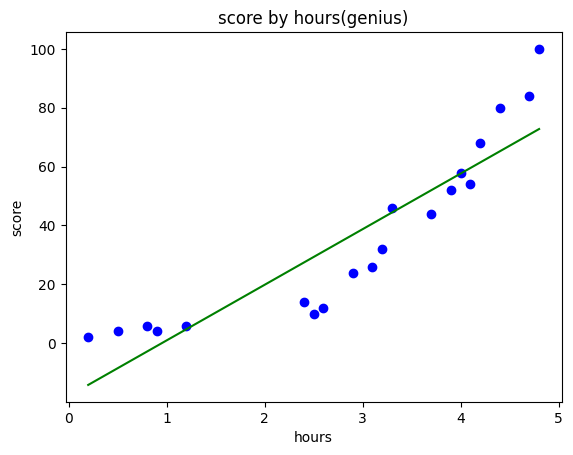

In [7]:
plt.scatter(X,y, color = 'blue')
plt.plot(X,reg.predict(X), color = 'green')
plt.title('score by hours(genius)')
plt.xlabel('hours')
plt.ylabel('score')

In [8]:
reg.score(X,y)  #전체데이터를 통한 모델 평가

0.8169296513411765

### 3-2. 다항 회귀

In [31]:
# feature인 x값을 직접 다항회귀에 맞게 바꿔줘야 한다.

from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=4)  # 2차 다항식
X_poly = poly_reg.fit_transform(X)
X_poly[:5] # [X] -> [X^0, X^1, X^2] -> X가 3이라면 [1,3,9]


array([[1.0000e+00, 2.0000e-01, 4.0000e-02, 8.0000e-03, 1.6000e-03],
       [1.0000e+00, 5.0000e-01, 2.5000e-01, 1.2500e-01, 6.2500e-02],
       [1.0000e+00, 8.0000e-01, 6.4000e-01, 5.1200e-01, 4.0960e-01],
       [1.0000e+00, 9.0000e-01, 8.1000e-01, 7.2900e-01, 6.5610e-01],
       [1.0000e+00, 1.2000e+00, 1.4400e+00, 1.7280e+00, 2.0736e+00]])

In [32]:
poly_reg.get_feature_names_out()

array(['1', 'x0', 'x0^2', 'x0^3', 'x0^4'], dtype=object)

In [34]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)  # 변환된 X와 y를 가지고 모델 생성(학습)

LinearRegression()

### 데이터 시각화(변환된 X와 y)

Text(0, 0.5, 'score')

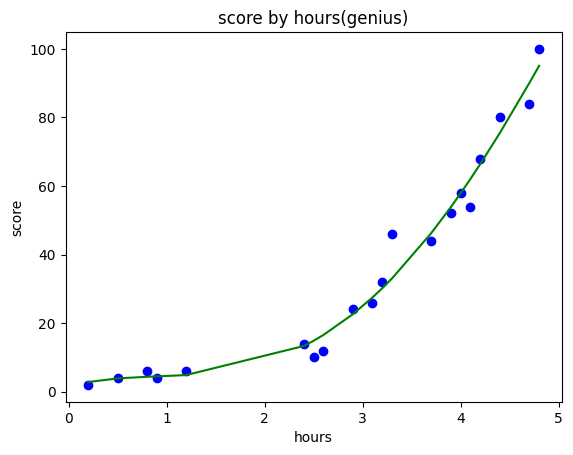

In [35]:
plt.scatter(X, y, color = 'blue')
plt.plot(X, lin_reg.predict(X_poly), color = 'green')
plt.title('score by hours(genius)')
plt.xlabel('hours')
plt.ylabel('score')
            

In [36]:
#X의 최소값에서 최대값까지의 범위를 0.1단위로 잘라서 데이터를 생성
X_range = np.arange(min(X), max(X), 0.1)
print(X_range)
X[:5]


[0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9
 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9 3.  3.1 3.2 3.3 3.4 3.5 3.6 3.7
 3.8 3.9 4.  4.1 4.2 4.3 4.4 4.5 4.6 4.7]


C:\Users\user\AppData\Local\Temp\ipykernel_28304\39178550.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_range = np.arange(min(X), max(X), 0.1)


array([[0.2],
       [0.5],
       [0.8],
       [0.9],
       [1.2]])

In [37]:
X_range = X_range.reshape(-1, 1)    #row갯수는 자동으로 계산(-1), column개수는 1개
# -1 대신에 len(X_range) 이렇게 해도 됨 

In [38]:
X_range[:5]

array([[0.2],
       [0.3],
       [0.4],
       [0.5],
       [0.6]])

Text(0, 0.5, 'score')

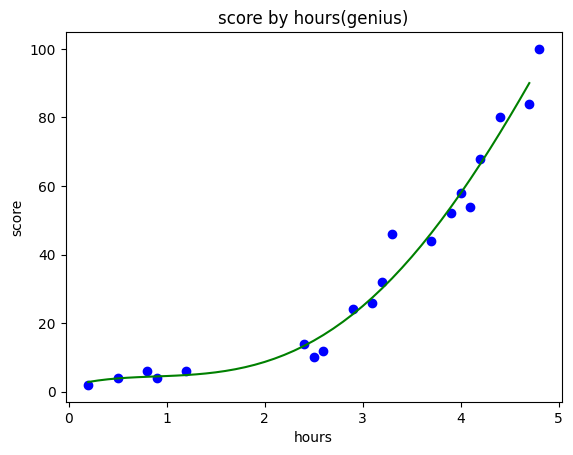

In [39]:
plt.scatter(X, y, color = 'blue')
plt.plot(X_range, lin_reg.predict(poly_reg.fit_transform(X_range)), color = 'green')
plt.title('score by hours(genius)')
plt.xlabel('hours')
plt.ylabel('score')

#### 공부시간에 따른 시험 성적 예측

In [40]:

# 단순 선형회귀 예측
reg.predict([[2]])

array([19.85348988])

In [43]:
#다항회귀로 변환 후 예측
lin_reg.predict(poly_reg.fit_transform([[2]]))

array([8.70559135])

In [44]:
lin_reg.score(X_poly, y)

0.9782775579000045